In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.community as nxcom

## Create a Directed Graph

In [2]:
directed_graph = nx.read_edgelist("connections.txt", create_using=nx.DiGraph(directed=True), nodetype=int)

In [3]:
# nx.draw(directed_graph, pos=nx.drawing.spring_layout(directed_graph), node_size=80)

## Show which nodes are bridges

In [4]:
undirected_graph = nx.read_edgelist("connections.txt", create_using=nx.Graph(), nodetype=int)

In [5]:
list(nx.bridges(undirected_graph))

[(0, 11),
 (0, 12),
 (0, 15),
 (0, 18),
 (0, 37),
 (0, 43),
 (0, 74),
 (0, 114),
 (0, 209),
 (0, 210),
 (0, 215),
 (0, 287),
 (0, 292),
 (0, 335),
 (107, 911),
 (107, 918),
 (107, 1096),
 (107, 1119),
 (107, 1145),
 (107, 1206),
 (107, 1386),
 (107, 1466),
 (107, 1560),
 (107, 1581),
 (107, 1834),
 (348, 358),
 (348, 447),
 (348, 550),
 (414, 585),
 (414, 602),
 (414, 607),
 (414, 608),
 (414, 613),
 (414, 624),
 (414, 638),
 (414, 668),
 (414, 674),
 (1684, 2842),
 (1684, 3031),
 (1684, 3071),
 (1684, 3183),
 (1684, 3230),
 (1912, 2079),
 (1912, 2195),
 (1912, 2269),
 (1912, 2457),
 (1912, 2470),
 (1912, 2569),
 (1912, 2596),
 (3437, 3451),
 (3437, 3453),
 (3437, 3570),
 (3437, 3650),
 (3437, 3709),
 (3437, 3729),
 (3437, 3748),
 (3437, 3798),
 (3437, 3820),
 (3437, 3853),
 (3437, 3856),
 (3437, 3935),
 (3437, 3974),
 (3980, 3984),
 (3980, 4008),
 (3980, 4010),
 (3980, 4015),
 (3980, 4022),
 (3980, 4024),
 (3980, 4035),
 (686, 692),
 (686, 801),
 (698, 875),
 (698, 883),
 (698, 891),


## Show graph density

In [6]:
print('Density: ', nx.density(directed_graph))

Density:  0.0054099817517196435


The density of a graph tells us how closely connected the nodes are to each other. In this case, the density of the directed graph is quite low, that is, the graph doesn't have a lot of edges connecting the nodes.

## Show which nodes have the highest and lowest number of connections

In [7]:
degrees = []
for i in directed_graph:
    degrees.append((i, directed_graph.degree[i]))

In [8]:
deg = np.array(degrees)[:, 1]

In [9]:
max_index = np.argmax(deg)
min_index = np.argmin(deg)
print(max_index, min_index)

107 11


In [10]:
print(degrees[max_index], degrees[min_index])

(107, 1045) (11, 1)


Node 107 has highest number of connections, i.e., 1045 and the node 11 has minimum number of connections, i.e., 1.

## Show which nodes have the highest incoming and outgoing connections

In [11]:
in_degrees = []
for i in directed_graph:
    in_degrees.append((i, directed_graph.in_degree[i]))
    
out_degrees = []
for i in directed_graph:
    out_degrees.append((i, directed_graph.out_degree[i]))

In [12]:
in_deg = np.array(in_degrees)[:, 1]
out_deg = np.array(out_degrees)[:, 1]

In [13]:
max_in_index = np.argmax(in_deg)
min_in_index = np.argmin(in_deg)
print(max_in_index, min_in_index)

max_out_index = np.argmax(out_deg)
min_out_index = np.argmin(out_deg)
print(max_out_index, min_out_index)

1373 0
107 11


In [14]:
print(in_degrees[max_in_index], in_degrees[min_in_index])
print(out_degrees[max_out_index], out_degrees[min_out_index])

(1888, 251) (0, 0)
(107, 1043) (11, 0)


Node 1888 has the highest incoming connections, i.e., 251 and the node 107 has the highest outgoing connections, i.e., 1043.

## Show which nodes have the highest closeness, betweenness, and eigenvector

#### Closeness

In [15]:
closeness = nx.closeness_centrality(directed_graph).items()
top_c = sorted(closeness, key=lambda pair: pair[1], reverse=True)[0:3]
top_c_indices = [i[0] for i in top_c]
top_c_closeness = [i[1] for i in top_c]

In [16]:
print('Top 3 nodes with highest closeness: ', top_c_indices)
print('The node with highest closeness: ', top_c[0])

Top 3 nodes with highest closeness:  [2642, 2649, 2629]
The node with highest closeness:  (2642, 0.11797503012816456)


Node 2642 has the shortest distances to all other nodes.

#### Betweenness

In [17]:
betwenness = nx.betweenness_centrality(directed_graph).items()
top_b = sorted(betwenness, key=lambda pair: pair[1],reverse=True)[0:3]
top_b_indices = [i[0] for i in top_b]
top_b_closeness = [i[1] for i in top_b]

In [18]:
print('Top 3 nodes with highest betweenness: ', top_b_indices)
print('The node with highest betweenness: ', top_b[0])

Top 3 nodes with highest betweenness:  [1684, 1912, 1718]
The node with highest betweenness:  (1684, 0.03299985344063623)


Node 1684 appears most frequently between other nodes.

#### Eigenvector

In [19]:
eigenvector = nx.eigenvector_centrality(directed_graph, max_iter= 500).items()
top_e = sorted(eigenvector, key=lambda pair: pair[1], reverse=True)[0:3]
top_e_indices = [i[0] for i in top_e]
top_e_closeness = [i[1] for i in top_e]

In [20]:
print('Top 3 nodes with highest eigenvector: ', top_e_indices)
print('The node with highest eigenvector: ', top_e[0])

Top 3 nodes with highest eigenvector:  [2655, 2654, 2646]
The node with highest eigenvector:  (2655, 0.802704299670652)


Node 2655 is connected to many nodes which have high scores as well.

## Implement a community detection algorithm on the directed graph and show how many communities were created

In [21]:
communities = sorted(nxcom.greedy_modularity_communities(directed_graph), key=len, reverse=True)
print(f"The graph has {len(communities)} communities.")

The graph has 11 communities.


In [22]:
for i, com in enumerate(communities):
    print(f'Community {i} has {len(com)} nodes')

Community 0 has 1001 nodes
Community 1 has 753 nodes
Community 2 has 747 nodes
Community 3 has 542 nodes
Community 4 has 363 nodes
Community 5 has 314 nodes
Community 6 has 208 nodes
Community 7 has 59 nodes
Community 8 has 38 nodes
Community 9 has 8 nodes
Community 10 has 6 nodes


## Show the largest and the smallest community.

In [23]:
largest_community = communities[0]
smallest_community = communities[-1]
print(f"Largest community: {largest_community}\n\nSmallest community: {smallest_community}")

Largest community: frozenset({107, 353, 363, 366, 389, 428, 475, 483, 484, 517, 526, 538, 566, 580, 596, 601, 606, 629, 2678, 637, 641, 2693, 649, 651, 656, 2760, 2764, 2822, 2883, 2941, 896, 897, 898, 899, 900, 902, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 959, 960, 961, 962, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 3057, 1010, 1011, 1012, 1013, 1015, 1014, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,

Largest community has the most number of interconnected nodes and the smallest community has the least number of interconnected nodes.

## Select the largest three communities and draw them. Remove the top 3 nodes with the highest Degree Centrality, Closeness Centrality, Betweenness Centrality, and Eigenvector. Each should be in a separate plot/draw.

In [24]:
largest = directed_graph.subgraph(largest_community)
smallest = directed_graph.subgraph(smallest_community)
largest2 = directed_graph.subgraph(communities[1])
largest3 = directed_graph.subgraph(communities[2])

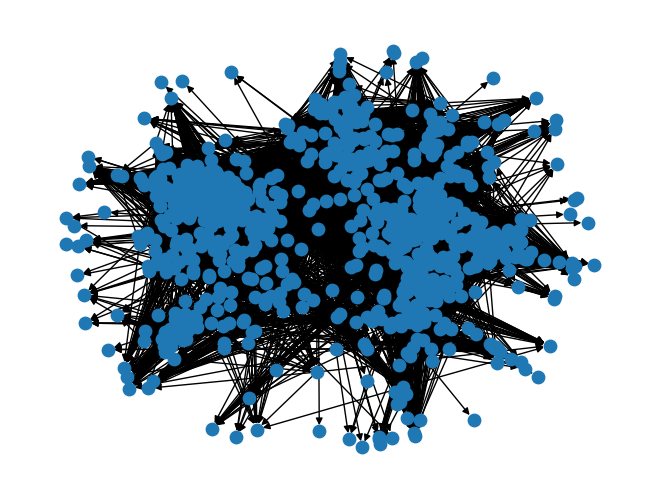

In [25]:
nx.draw(largest, node_size=80)

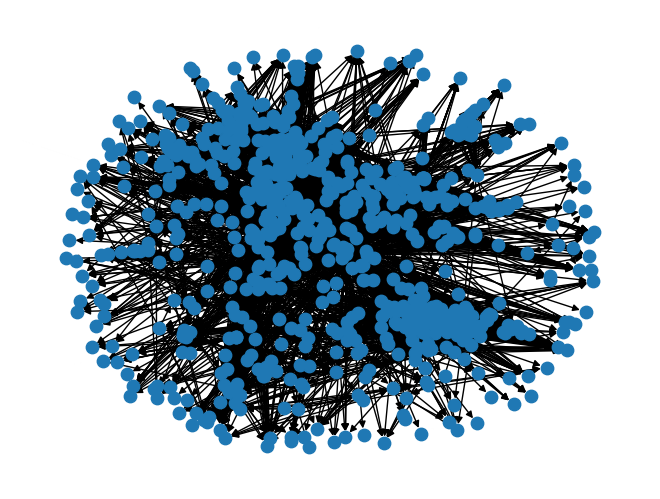

In [26]:
nx.draw(largest2, node_size=80)

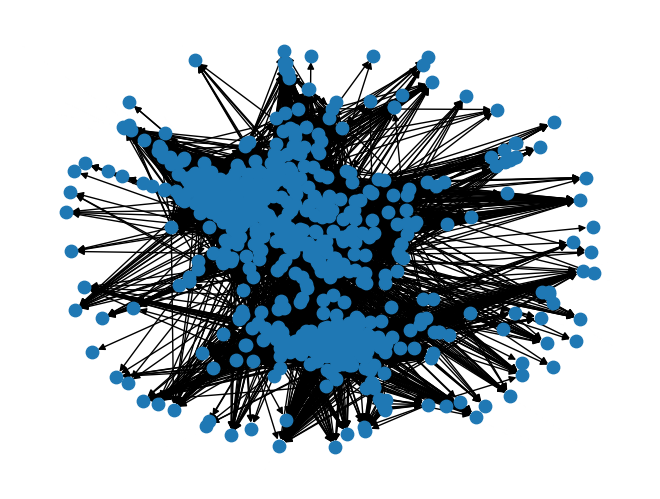

In [27]:
nx.draw(largest3, node_size=80)

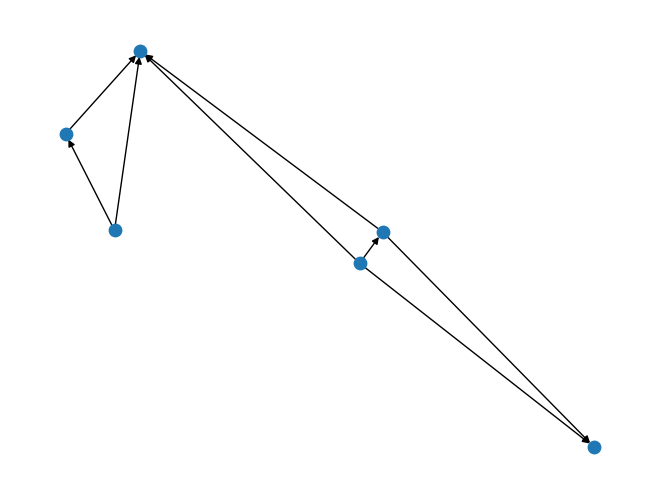

In [28]:
nx.draw(smallest, node_size=80)

#### Remove top3 nodes with max degree

DiGraph with 998 nodes and 25577 edges: removed top3 nodes with max degree [107, 1888, 1800]


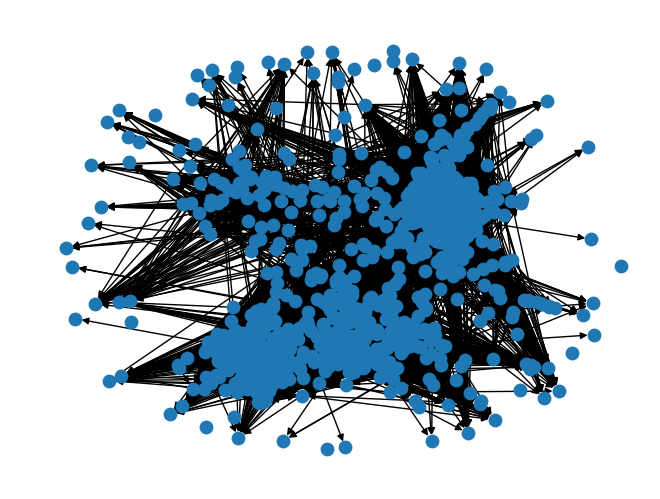

DiGraph with 750 nodes and 6491 edges: removed top3 nodes with max degree [3437, 686, 3830]


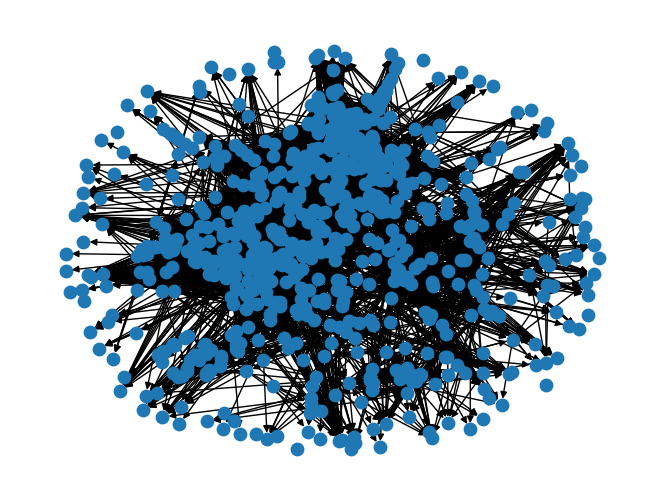

DiGraph with 744 nodes and 13386 edges: removed top3 nodes with max degree [1684, 2839, 3363]


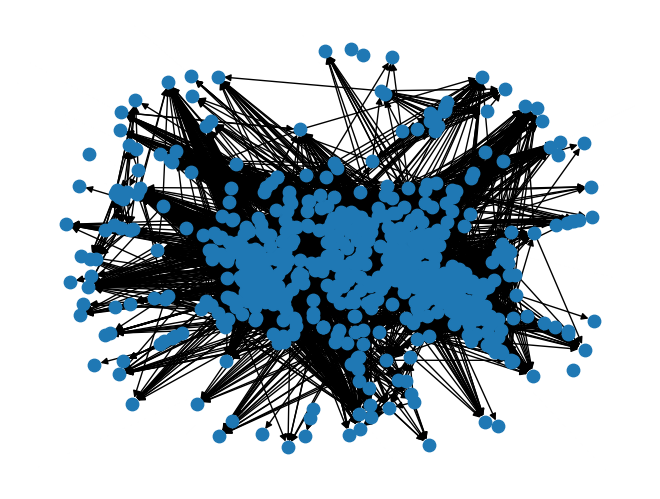

In [29]:
for i in [largest.copy(), largest2.copy(), largest3.copy()]:
    deg = nx.degree_centrality(i).items()
    top_d = sorted(deg, key=lambda pair: pair[1], reverse=True)[0:3]
    top_d = [i[0] for i in top_d]
    i.remove_nodes_from(top_d)
    print(f"{i}: removed top3 nodes with max degree {top_d}")
    nx.draw(i, node_size=80)
    plt.show()

#### Remove top3 nodes with max closeness

DiGraph with 998 nodes and 26723 edges: removed top3 nodes with max closeness [1881, 1888, 1885]


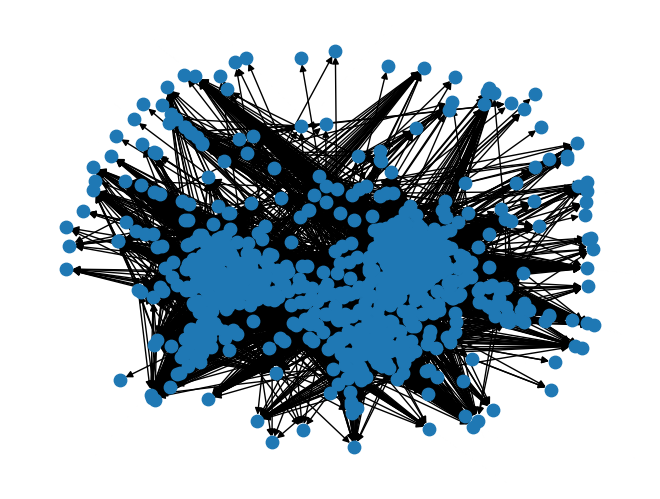

DiGraph with 750 nodes and 7186 edges: removed top3 nodes with max closeness [3948, 3918, 3962]


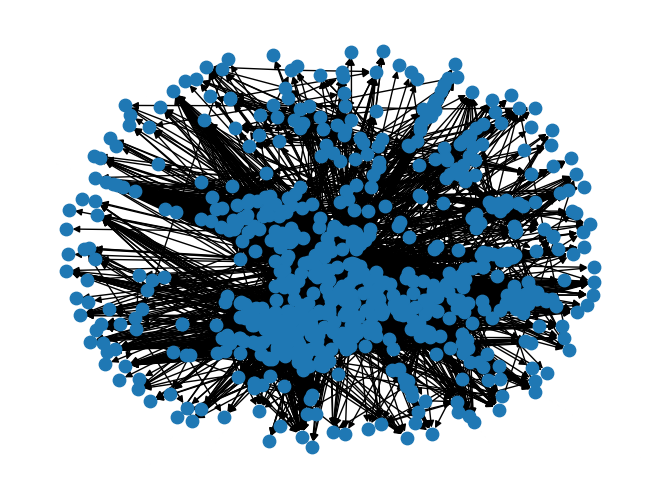

DiGraph with 744 nodes and 14127 edges: removed top3 nodes with max closeness [3397, 3434, 3403]


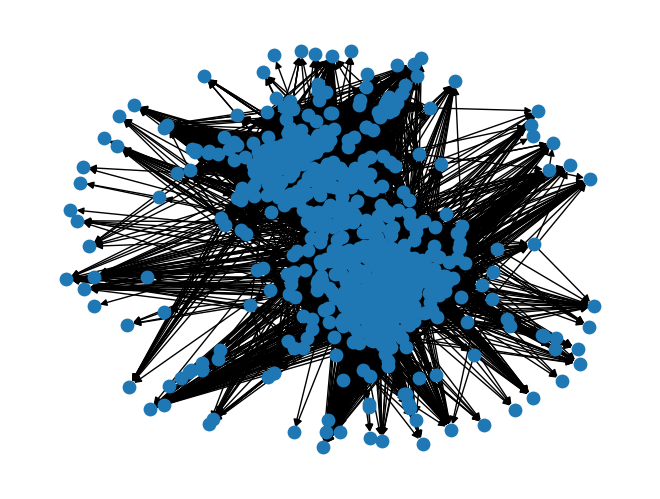

In [30]:
for i in [largest.copy(), largest2.copy(), largest3.copy()]:
    closeness = nx.closeness_centrality(i).items()
    top_c = sorted(closeness, key=lambda pair: pair[1], reverse=True)[0:3]
    top_c = [i[0] for i in top_c]
    i.remove_nodes_from(top_c)
    print(f"{i}: removed top3 nodes with max closeness {top_c}")
    nx.draw(i, node_size=80)
    plt.show()

#### Remove top3 nodes with max betweenness

DiGraph with 998 nodes and 26586 edges: removed top3 nodes with max betweenness [1086, 1584, 1435]


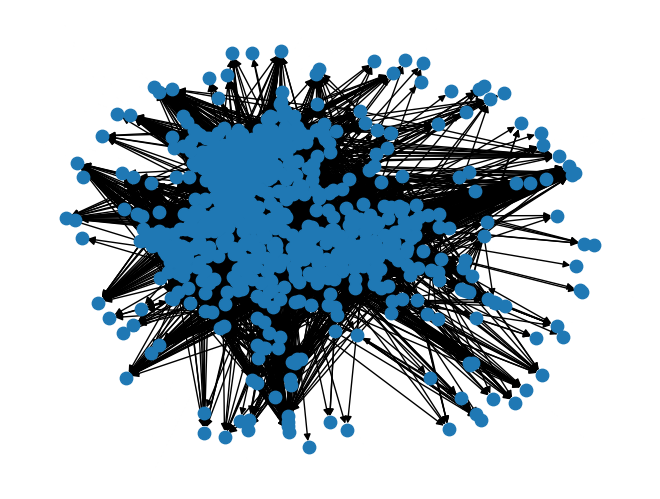

DiGraph with 750 nodes and 6625 edges: removed top3 nodes with max betweenness [3604, 3437, 698]


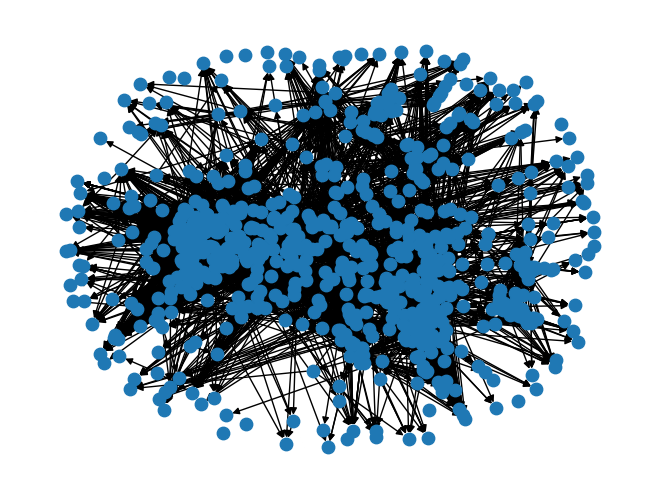

DiGraph with 744 nodes and 14179 edges: removed top3 nodes with max betweenness [2946, 3117, 3078]


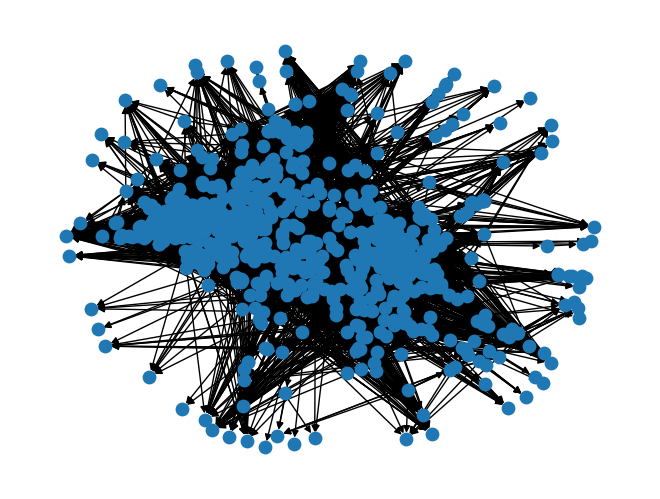

In [31]:
for i in [largest.copy(), largest2.copy(), largest3.copy()]:
    betweenness = nx.betweenness_centrality(i).items()
    top_b = sorted(betweenness, key=lambda pair: pair[1], reverse=True)[0:3]
    top_b = [i[0] for i in top_b]
    i.remove_nodes_from(top_b)
    print(f"{i}: removed top3 nodes with max betweenness {top_b}")
    nx.draw(i, node_size=80)
    plt.show()

#### Remove top3 nodes with max degree, closeness, betweenness simultaneously

DiGraph with 998 nodes and 25577 edges: removed top3 nodes with max degree [107, 1888, 1800]
DiGraph with 995 nodes and 25468 edges: removed top3 nodes with max closeness [1881, 1885, 1897]
DiGraph with 992 nodes and 25006 edges: removed top3 nodes with max betweenness [1086, 1584, 1435]


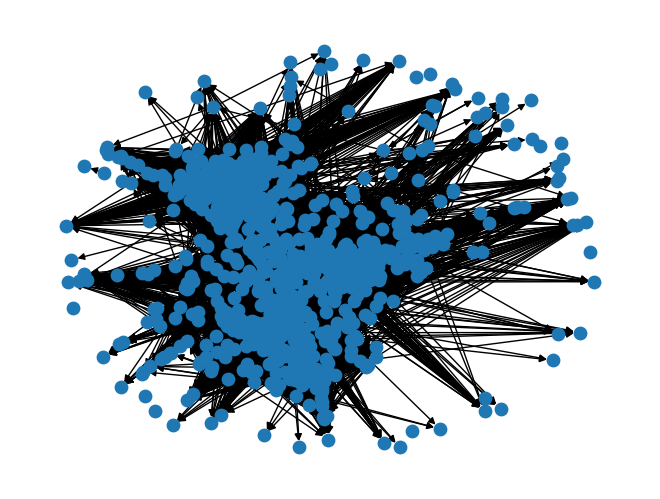

DiGraph with 750 nodes and 6491 edges: removed top3 nodes with max degree [3437, 686, 3830]
DiGraph with 747 nodes and 6320 edges: removed top3 nodes with max closeness [3948, 3938, 3962]
DiGraph with 744 nodes and 6153 edges: removed top3 nodes with max betweenness [3604, 3617, 698]


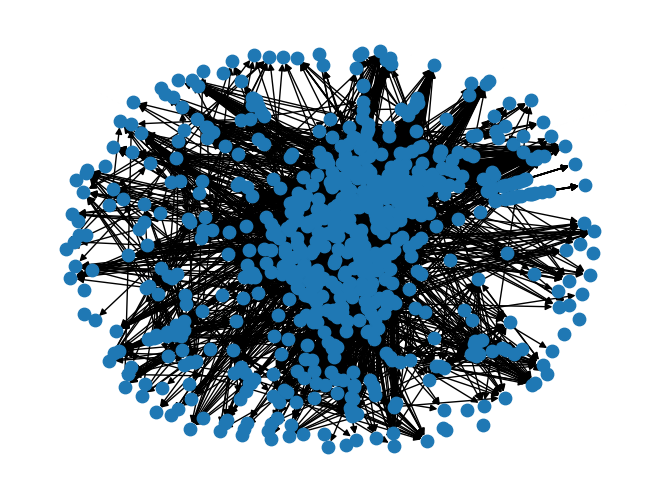

DiGraph with 744 nodes and 13386 edges: removed top3 nodes with max degree [1684, 2839, 3363]
DiGraph with 741 nodes and 13119 edges: removed top3 nodes with max closeness [3397, 3434, 3403]
DiGraph with 738 nodes and 12910 edges: removed top3 nodes with max betweenness [2946, 3117, 3078]


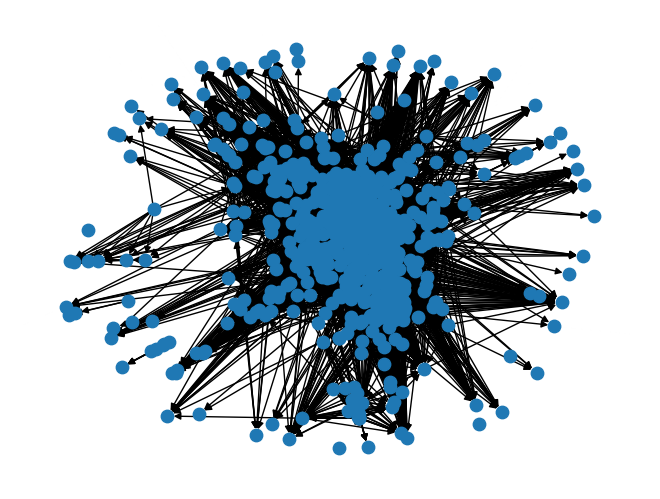

In [32]:
for i in [largest.copy(), largest2.copy(), largest3.copy()]:
    deg = nx.degree_centrality(i).items()
    top_d = sorted(deg, key=lambda pair: pair[1], reverse=True)[0:3]
    top_d = [i[0] for i in top_d]
    i.remove_nodes_from(top_d)
    print(f"{i}: removed top3 nodes with max degree {top_d}")
    
    closeness = nx.closeness_centrality(i).items()
    top_c = sorted(closeness, key=lambda pair: pair[1], reverse=True)[0:3]
    top_c = [i[0] for i in top_c]
    i.remove_nodes_from(top_c)
    print(f"{i}: removed top3 nodes with max closeness {top_c}")
    
    betweenness = nx.betweenness_centrality(i).items()
    top_b = sorted(betweenness, key=lambda pair: pair[1], reverse=True)[0:3]
    top_b = [i[0] for i in top_b]
    i.remove_nodes_from(top_b)
    print(f"{i}: removed top3 nodes with max betweenness {top_b}")
    
    nx.draw(i, node_size=80)
    plt.show()

## Draw the influencers of those top 3 communities

DiGraph with 1001 nodes and 27057 edges: top node with max closeness [1881, 0.3334852652259332]
DiGraph with 1001 nodes and 27057 edges: top node with max betweenness [1086, 0.021008218231951963]


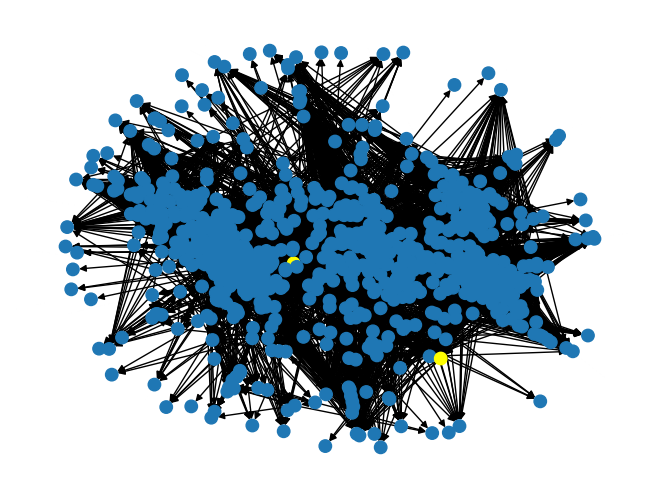

DiGraph with 753 nodes and 7312 edges: top node with max closeness [3948, 0.15646128576339816]
DiGraph with 753 nodes and 7312 edges: top node with max betweenness [3604, 0.012738103698395549]


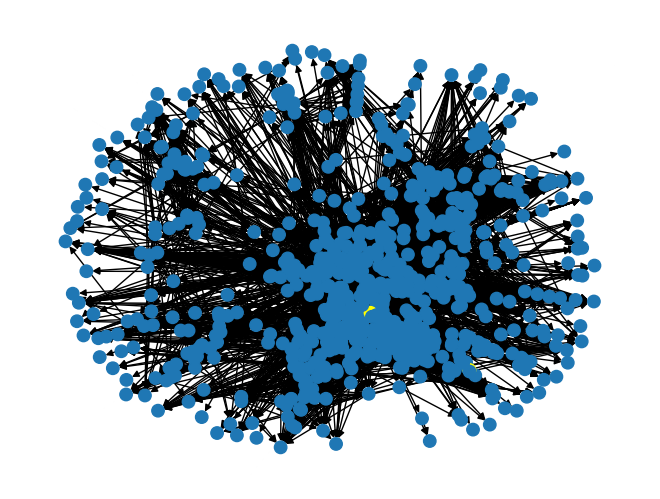

DiGraph with 747 nodes and 14397 edges: top node with max closeness [3397, 0.3098939790765014]
DiGraph with 747 nodes and 14397 edges: top node with max betweenness [2946, 0.029174094184520032]


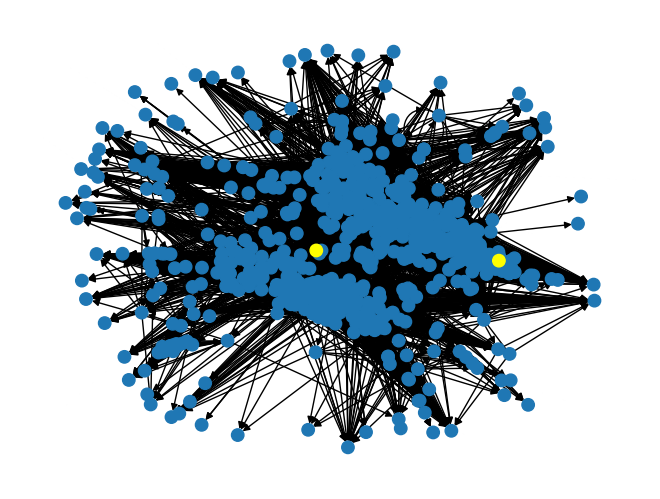

In [33]:
for i in [largest.copy(), largest2.copy(), largest3.copy()]:
    closeness = nx.closeness_centrality(i).items()
    top_c = sorted(closeness, key=lambda pair: pair[1], reverse=True)[0]
    top_c = [i for i in top_c]
    print(f"{i}: top node with max closeness {top_c}")
        
    betweenness = nx.betweenness_centrality(i).items()
    top_b = sorted(betweenness, key=lambda pair: pair[1], reverse=True)[0]
    top_b = [i for i in top_b]
    print(f"{i}: top node with max betweenness {top_b}")
    
    top_i = top_c + top_b
    color_map= ['yellow' if node in top_i else 'tab:blue' for node in i.nodes]

    nx.draw(i, node_color=color_map, node_size=80)
    plt.show()

## Design an action plan:
- Use hypothetical business (telecom, marketing agency, etc.)
- Use a hypothetical marketing budget
- Use a hypothetical cost per action (advertisement cost)
- Decide whom should you target?

In the case of a telecom business with a given budget and need to get the most value for the least cost, I'd target the influencers that have the maximum closeness and betweenness. Influencers make other people follow them, hence, they are a good target. Additionally, as each advertisement costs some amount of finances, targeting just a few influencers is cheaper than targeting the community directly.